In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 数列

## NumPyによる数列の実装

In [2]:
#単純な等差数列の記法，初項末項等差
A = range(1, 10, 2)

for N in A:
    print(N)

1
3
5
7
9


In [3]:
# NumPyの記法1，初項末項等差
a1 = np.arange(1, 10, 2)
a1

array([1, 3, 5, 7, 9])

In [4]:
# NumPyの記法2，初項末項項数
np.linspace(1, 9, 5)

array([1., 3., 5., 7., 9.])

In [5]:
# 等比数列，公比の設定
A = np.ones(5) * 2
A

array([2., 2., 2., 2., 2.])

In [6]:
# 2**1,2**2,...
A ** np.arange(5)

array([ 1.,  2.,  4.,  8., 16.])

In [7]:
# NumPyの記法，base^開始base^終了項数base
np.logspace(1, 4, 4, base=2)

array([ 2.,  4.,  8., 16.])

In [8]:
# NumPyの記法，初項末項項数
np.geomspace(1, 16, 5)

array([ 1.,  2.,  4.,  8., 16.])

## SymPyによる数列の実装

## 数列の和

In [9]:
np.sum(a1)

25

## 漸化式の記述

In [10]:
# 等差数列の漸化式（再帰）
def Seq1(N):
    if N == 0:  # 初項
        return 1
    else:
        return Seq1(N-1) + 2


print([Seq1(N) for N in range(0, 5)])

[1, 3, 5, 7, 9]


In [11]:
# NumPyで等差数列の漸化式（再帰）
Seq2 = np.zeros(5)
Seq2[0] = 1  # 初項

for N in range(1, 5):
    Seq2[N] = Seq2[N-1] + 2  # 式を書く

Seq2

array([1., 3., 5., 7., 9.])

In [12]:
# NumPyで等比数列の漸化式（再帰）
Seq3 = np.zeros(5)
Seq3[0] = 1  # 初項

for N in range(1, 5):
    Seq3[N] = Seq3[N-1] * 2  # 式を書く

Seq3

array([ 1.,  2.,  4.,  8., 16.])

## SymPyで漸化式を解く

例題
$$
a_1 = 1 , \ a_{n+1} = 3a_n + 2
$$

# 積分

## 定積分とは数列の「極限（ある意味で）」

In [13]:
# リーマン積分
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2


def Riemann(d, a, b):
    x = np.arange(a, b + d, d)
    y = f(x)
    v = d*y
    rS = sum(v)
    return rS


d = 1e-3
a = 0.0
b = 6.0

rS = Riemann(d, a, b)
rS

72.01800099999994

In [14]:
#誤差
print("rS=", rS, "誤差=", rS - 72)

rS= 72.01800099999994 誤差= 0.018000999999941314


## 数値積分（台形法）の実装

In [15]:
# 台形法
def f(x):
    return x**2


def trapezoid(d, a, b):
    x = np.arange(a, b + d, d)
    y = f(x)
    n = int((b-a)/d)
    t = np.zeros(n)

    for i in range(0, n):
        t[i] = (y[i]+y[i+1])*d/2

    tS = sum(t)

    return tS


d = 1e-3
a = 0.0
b = 6.0
tS = trapezoid(d, a, b)
print("tS=", tS, "誤差=", tS - 72)

tS= 72.00000099999995 誤差= 9.999999548426786e-07


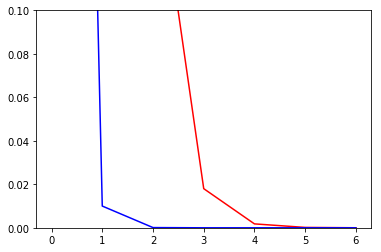

In [16]:
dlist = np.array([1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

rS_list = np.zeros(7)
tS_list = np.zeros(7)

for i in range(0, 7):
    rS_list[i] = Riemann(dlist[i], a, b)
    tS_list[i] = trapezoid(dlist[i], a, b)

err_rS = rS_list - 72
err_tS = tS_list - 72

plt.ylim(0, 0.1)
plt.plot(err_rS, color = "r")
plt.plot(err_tS, color = "b")

## SciPyによる積分

In [17]:
from scipy import integrate


def f(x):
    return x**2


integrate.quad(f, 0, 6)

(72.00000000000001, 7.993605777301129e-13)

In [46]:
from scipy import integrate


def f(x):
    return x**2

# x**2
# np.sin(x)
# np.exp(x)
# np.log(x) / x (1,)
# np.exp(-x**2/2)
# np.exp(-x**2/2)/np.sqrt(2*np.pi)
# 4/(1+x**2) (0,1)


d = 1e-3
a = 0.0
b = 1.0

# リーマン積分


def Riemann(d, a, b):
    x = np.arange(a, b + d, d)
    y = f(x)
    v = d*y
    rS = sum(v)
    return rS


rS = Riemann(d, a, b)

# 台形法


def trapezoid(d, a, b):
    x = np.arange(a, b + d, d)
    y = f(x)
    n = int((b-a)/d)
    t = np.zeros(n)

    for i in range(0, n):
        t[i] = (y[i]+y[i+1])*d/2

    tS = sum(t)

    return tS


tS = trapezoid(d, a, b)

# SciPy

sS = integrate.quad(f, a, b)

print("リーマン:", rS)
print("台形", tS)
print("scipy:", sS)

リーマン: 3.1445924869231217
台形 3.1415924869231278
scipy: (3.1415926535897936, 3.4878684980086326e-14)


## SymPyによる積分

## （発展）モンテカルロ法

参考：http://aidiary.hatenablog.com/entry/20140728/1406555863

$$
I = \int_a^b f(x) dx
$$
において，aからbの値をとるN個の一様乱数を生成して，
$$
I_N = (b-a)\frac{1}{N}\sum f(x)
$$
を近似値とする。

（精度が低いように見えるが，多重積分などの複雑な計算で威力を発揮する（らしい））

In [47]:
from scipy.stats import uniform


def f(x):
    return 4/(1+x**2)


a = 0
b = 1
N = 10**5


# モンテカルロ積分


def MC(N, a, b):
    x = uniform(a, b-a).rvs(N)
    mS = (b - a) * np.mean(f(x))
    return mS


mS = MC(N, a, b)

# scipy
sS = integrate.quad(f, a, b)


print("scipy:", sS)
print("モンテカルロ積分:", mS)

scipy: (3.1415926535897936, 3.4878684980086326e-14)
モンテカルロ積分: 3.1398888227970425


# 確率分布